# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

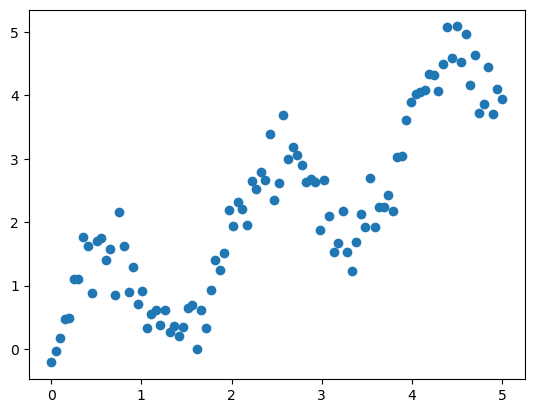

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5763069066533527


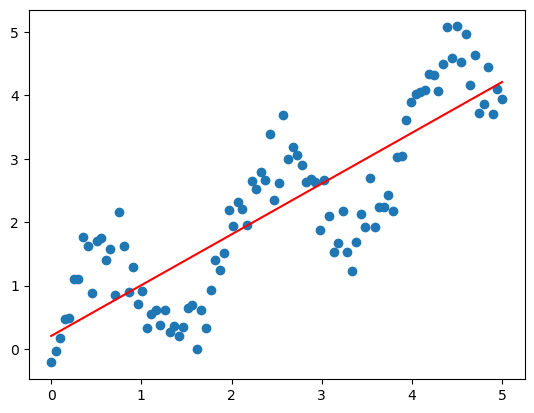

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

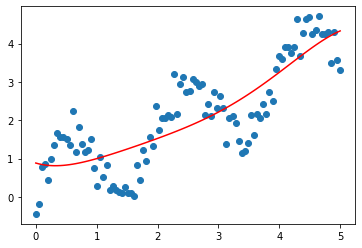

In [15]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [12]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.42758509  1.10670064 -0.57206111  0.13804271 -0.01172701]
interception:  0.7786841012023555


In [14]:
#手刻L
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b
#W為1*5，所以需轉置才能算dot，轉置後變成100*5 dot 5*1

array([0.7786841 , 0.75983902, 0.74621007, 0.73738684, 0.73297953,
       0.73261851, 0.73595387, 0.74265493, 0.75240981, 0.76492492,
       0.77992455, 0.79715038, 0.816361  , 0.83733151, 0.85985299,
       0.88373205, 0.90879041, 0.93486441, 0.96180452, 0.98947493,
       1.01775304, 1.04652905, 1.07570544, 1.10519654, 1.13492808,
       1.16483668, 1.19486945, 1.22498347, 1.25514537, 1.28533083,
       1.31552417, 1.34571781, 1.3759119 , 1.40611378, 1.43633756,
       1.46660365, 1.49693827, 1.52737304, 1.55794447, 1.58869353,
       1.61966516, 1.65090782, 1.68247305, 1.71441495, 1.7467898 ,
       1.77965552, 1.81307123, 1.84709683, 1.88179248, 1.91721818,
       1.95343326, 1.99049597, 2.02846299, 2.06738898, 2.1073261 ,
       2.14832354, 2.19042711, 2.23367872, 2.27811595, 2.32377157,
       2.37067308, 2.41884227, 2.46829472, 2.51903938, 2.57107807,
       2.62440504, 2.67900648, 2.73486012, 2.79193469, 2.85018949,
       2.90957397, 2.97002719, 3.03147741, 3.09384161, 3.15702

In [16]:
#函式計算L
Y_poly=regr_poly.predict(X_poly)
mse = np.sum((Y_poly-y)**2) / len(y)
print(mse)

0.5263526351313794


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

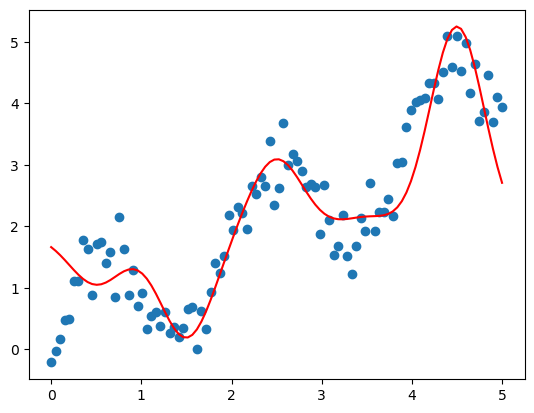

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.80734046 -1.67574233  1.23418676  0.27900031  3.38550348]
interception:  1.862491284180101


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

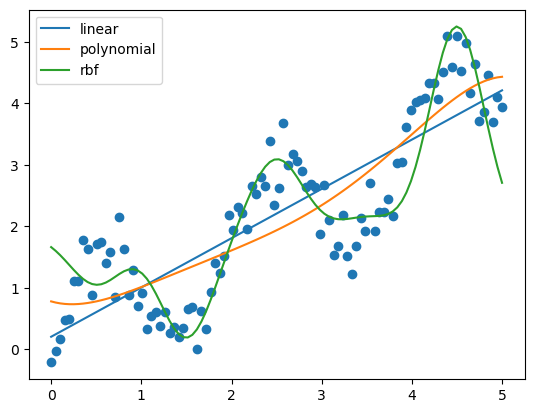

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
#線性
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5763069066533527


In [29]:
#多元
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5531666918302569


In [30]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.28356996943295043
